In [84]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [85]:
# read in the cities df 
#cities_df = pd.read_csv('../earthquake_city_data/Cities_df')
#cities_df.head()

In [86]:
# read in the pager df
#pager_df = pd.read_csv('../main_data/pager_df')
#pager_df.head()

In [87]:
#pager_df.info()

In [88]:
#columns_join_pager = pager_df[['id', 'country', 'pager_version', 
#                               'mmi1', 'mmi2', 'mmi3','mmi4',
#                               'mmi5','mmi6','mmi7','mmi8','mmi9','mmi10',]]
#columns_join_pager

In [89]:
dyfi_df = pd.read_csv('../Data/main_dataset', index_col=None)
dyfi_df.head()

,Unnamed: 0.1,Unnamed: 0,id,time,location,latitude,longitude,depth,magnitude,alert,url,eventtype,significance,City,country,pager_version,mmi1,mmi2,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10,intensity,distance
0,4937,4937,ci9627721,2001-02-10 21:05:05.780,"6km NNW of Big Bear Lake, CA",34.2895,-116.945833,7.611,4.66,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,814,Los_Angeles,Total,1.0,7124876.0,2169417.0,484915.0,18251.0,1341.0,0.0,0.0,0.0,0.0,0.0,1.0,144.950820
1,4938,4937,ci9627721,2001-02-10 21:05:05.780,"6km NNW of Big Bear Lake, CA",34.2895,-116.945833,7.611,4.66,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,814,Los_Angeles,Total,1.0,7124876.0,2169417.0,484915.0,18251.0,1341.0,0.0,0.0,0.0,0.0,0.0,2.0,101.329588
2,4939,4937,ci9627721,2001-02-10 21:05:05.780,"6km NNW of Big Bear Lake, CA",34.2895,-116.945833,7.611,4.66,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,814,Los_Angeles,Total,1.0,7124876.0,2169417.0,484915.0,18251.0,1341.0,0.0,0.0,0.0,0.0,0.0,2.1,87.588235
3,4940,4937,ci9627721,2001-02-10 21:05:05.780,"6km NNW of Big Bear Lake, CA",34.2895,-116.945833,7.611,4.66,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,814,Los_Angeles,Total,1.0,7124876.0,2169417.0,484915.0,18251.0,1341.0,0.0,0.0,0.0,0.0,0.0,2.2,107.136170
4,4941,4937,ci9627721,2001-02-10 21:05:05.780,"6km NNW of Big Bear Lake, CA",34.2895,-116.945833,7.611,4.66,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,814,Los_Angeles,Total,1.0,7124876.0,2169417.0,484915.0,18251.0,1341.0,0.0,0.0,0.0,0.0,0.0,2.4,94.846154


#### We can look at all the different seismometer measurements for a single earthquake event

In [90]:
dyfi_df[dyfi_df['id']=='ci9627721'].head(2)

,Unnamed: 0.1,Unnamed: 0,id,time,location,latitude,longitude,depth,magnitude,alert,url,eventtype,significance,City,country,pager_version,mmi1,mmi2,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10,intensity,distance
0,4937,4937,ci9627721,2001-02-10 21:05:05.780,"6km NNW of Big Bear Lake, CA",34.2895,-116.945833,7.611,4.66,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,814,Los_Angeles,Total,1.0,7124876.0,2169417.0,484915.0,18251.0,1341.0,0.0,0.0,0.0,0.0,0.0,1.0,144.950820
1,4938,4937,ci9627721,2001-02-10 21:05:05.780,"6km NNW of Big Bear Lake, CA",34.2895,-116.945833,7.611,4.66,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,814,Los_Angeles,Total,1.0,7124876.0,2169417.0,484915.0,18251.0,1341.0,0.0,0.0,0.0,0.0,0.0,2.0,101.329588


In [91]:
#dyfi_df = pd.read_csv('../Data/dyfi_csv_new')
#dyfi_df.head()

## Is there a linear relationship between earthquake intensity and distance from the earthquake?

The answer seems to be **yes**. If we run a simple linear regression on these two variables, with each individual earthquake acting as a separate dataset, there seems to be a consistent grouping of coefficients $\{m,b\}$ for the linear equation $y=mx+b$

In [92]:
from sklearn.linear_model import LinearRegression

In [103]:
test_eq = dyfi_df[dyfi_df['id'] == 'ci9627721']

#we don't necessarily need to drop this
#test_eq.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
test_eq.head()

,Unnamed: 0.1,Unnamed: 0,id,time,location,latitude,longitude,depth,magnitude,alert,url,eventtype,significance,City,country,pager_version,mmi1,mmi2,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10,intensity,distance
0,4937,4937,ci9627721,2001-02-10 21:05:05.780,"6km NNW of Big Bear Lake, CA",34.2895,-116.945833,7.611,4.66,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,814,Los_Angeles,Total,1.0,7124876.0,2169417.0,484915.0,18251.0,1341.0,0.0,0.0,0.0,0.0,0.0,1.0,144.950820
1,4938,4937,ci9627721,2001-02-10 21:05:05.780,"6km NNW of Big Bear Lake, CA",34.2895,-116.945833,7.611,4.66,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,814,Los_Angeles,Total,1.0,7124876.0,2169417.0,484915.0,18251.0,1341.0,0.0,0.0,0.0,0.0,0.0,2.0,101.329588
2,4939,4937,ci9627721,2001-02-10 21:05:05.780,"6km NNW of Big Bear Lake, CA",34.2895,-116.945833,7.611,4.66,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,814,Los_Angeles,Total,1.0,7124876.0,2169417.0,484915.0,18251.0,1341.0,0.0,0.0,0.0,0.0,0.0,2.1,87.588235
3,4940,4937,ci9627721,2001-02-10 21:05:05.780,"6km NNW of Big Bear Lake, CA",34.2895,-116.945833,7.611,4.66,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,814,Los_Angeles,Total,1.0,7124876.0,2169417.0,484915.0,18251.0,1341.0,0.0,0.0,0.0,0.0,0.0,2.2,107.136170
4,4941,4937,ci9627721,2001-02-10 21:05:05.780,"6km NNW of Big Bear Lake, CA",34.2895,-116.945833,7.611,4.66,green,https://earthquake.usgs.gov/earthquakes/eventp...,earthquake,814,Los_Angeles,Total,1.0,7124876.0,2169417.0,484915.0,18251.0,1341.0,0.0,0.0,0.0,0.0,0.0,2.4,94.846154


<Axes: xlabel='Slope', ylabel='Count'>

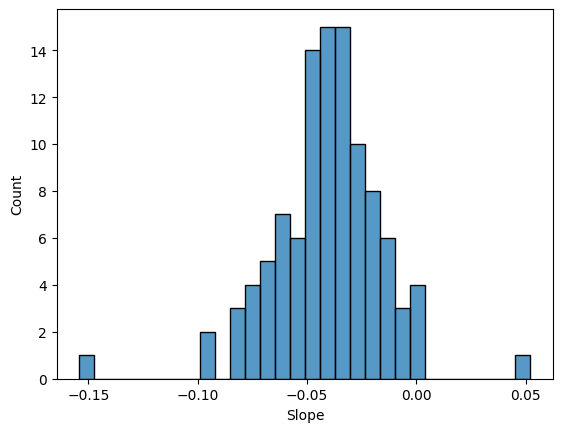

In [104]:
intercepts = []
slopes = []
for i in dyfi_df['id'].unique():
    try:
        #create a sample dataset for each earthquake
        temp_df = dyfi_df[dyfi_df['id'] == i]
        
        X = np.array(temp_df['distance']).reshape(-1,1)
        y = temp_df['intensity']

        #run a linear regression model
        linreg = LinearRegression()
        linreg.fit(X,y)

        #detail the predicted slope and y-intercept
        intercepts.append(linreg.intercept_)
        slopes.append(linreg.coef_[0])
    except:
        pass

slope_df = pd.DataFrame((intercepts,slopes)).T

slope_df.columns = ['Intercept', 'Slope']

sns.histplot(data=slope_df,x='Slope', bins = 30)

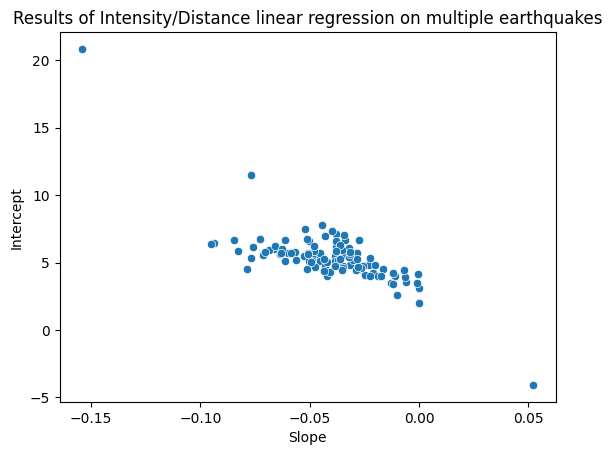

In [105]:
sns.scatterplot(data=slope_df,x='Slope', y = 'Intercept')
plt.title('Results of Intensity/Distance linear regression on multiple earthquakes')
plt.show();

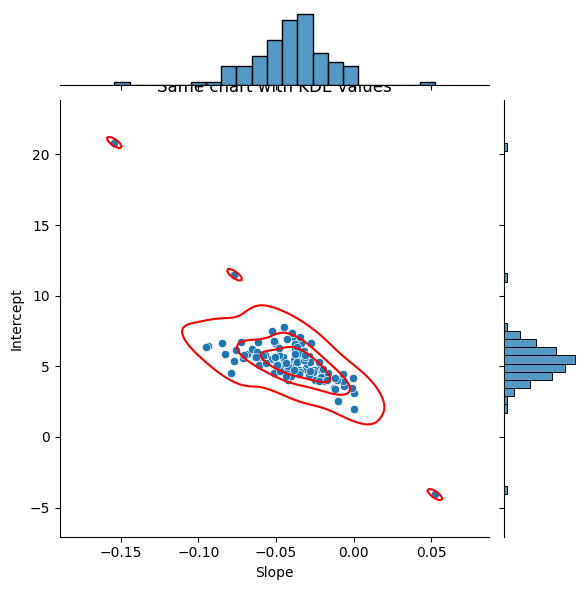

In [106]:
g = sns.jointplot(data=slope_df,x='Slope', y = 'Intercept')
g.plot_joint(sns.kdeplot, color='red', levels=4)
plt.title('Same chart with KDE values')
plt.show();

In [107]:
#taking the mean slope and y-intercept, removing the top 2 and bottom two outlying values
slope_mean = slope_df['Slope'].sort_values()[2:-2].mean()
slope_intercept = slope_df['Intercept'].sort_values()[2:-2].mean()
print(f"Mean slope: {np.round(slope_mean,3)}")
print(f"Mean intercept: {np.round(slope_intercept,3)}")

Mean slope: -0.041
Mean intercept: 5.302


### We can also visually inspect and make an educated guess of an inverse linear relationship between Intensity and Distance

We've chosen an arbitrary earthquake to visualize the relationship

In [119]:
X = np.array(test_eq['distance']).reshape(-1,1)
y = test_eq['intensity']

linreg = LinearRegression()
linreg.fit(X,y)

print(f"Slope: {linreg.coef_}")
print(f'Intercept: {linreg.intercept_}')

Slope: [-0.03803339]
Intercept: 6.144883229795083


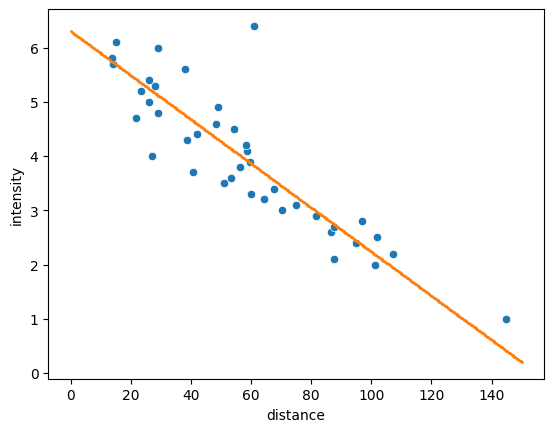

In [120]:
x = np.linspace(0,150,500)
y = slope_mean * x + slope_intercept+1

ax1 = sns.scatterplot(data = test_eq[test_eq['distance'] < 500], x = 'distance', y = 'intensity')
ax2 = plt.scatter(x,y, s=1)

plt.show()

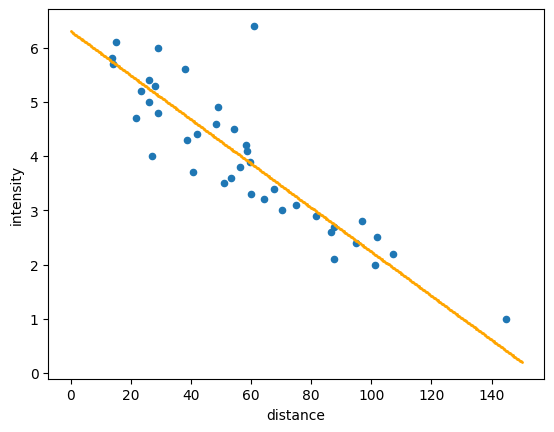

In [121]:
test_eq.groupby('intensity')['distance'].mean().reset_index(
).plot(kind='scatter', x = 'distance', y='intensity')

ax2 = plt.scatter(x,y, s=1, color='orange')

plt.show()

In [122]:
dyfi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32750 entries, 0 to 32749
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0.1   32750 non-null  int64  
 1   Unnamed: 0     32750 non-null  int64  
 2   id             32750 non-null  object 
 3   time           32750 non-null  object 
 4   location       32749 non-null  object 
 5   latitude       32750 non-null  float64
 6   longitude      32750 non-null  float64
 7   depth          32750 non-null  float64
 8   magnitude      31953 non-null  float64
 9   alert          12750 non-null  object 
 10  url            32750 non-null  object 
 11  eventtype      32750 non-null  object 
 12  significance   32750 non-null  int64  
 13  City           32750 non-null  object 
 14  country        12750 non-null  object 
 15  pager_version  12750 non-null  float64
 16  mmi1           12750 non-null  float64
 17  mmi2           12750 non-null  float64
 18  mmi3  

In [124]:
## Join the pager_df to the cities df but only grab the id columns and the everything after paper vision
#pager_city_join = pd.merge(cities_df, columns_join_pager, on = 'id', how = 'left')
#pager_city_join.info()

In [125]:
#pager_city_join.head()

In [126]:
len(dyfi_df)

32750

In [127]:
## groupby the dyfi dataframe by the Id
dyfi_grouped = dyfi_df.groupby(['id', 'intensity'])[['distance']].mean().reset_index()
dyfi_grouped

,id,intensity,distance
0,ci10275733,1.0,74.558824
1,ci10275733,2.0,69.410749
2,ci10275733,2.1,62.967742
3,ci10275733,2.2,74.239535
4,ci10275733,2.3,55.000000
...,...,...,...
3210,nc73895826,4.9,8.000000
3211,nc73895826,5.3,20.000000
3212,nc73895826,5.5,17.000000
3213,nc73895826,5.8,10.000000


<Axes: xlabel='distance', ylabel='intensity'>

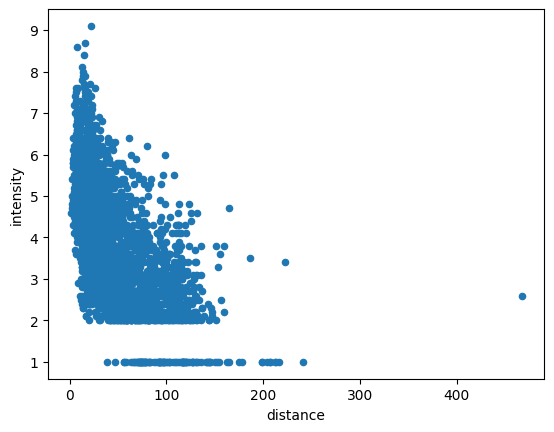

In [128]:
dyfi_grouped[dyfi_grouped['distance'] < 500].plot(kind='scatter', x = 'distance', y='intensity')

<Axes: xlabel='distance', ylabel='intensity'>

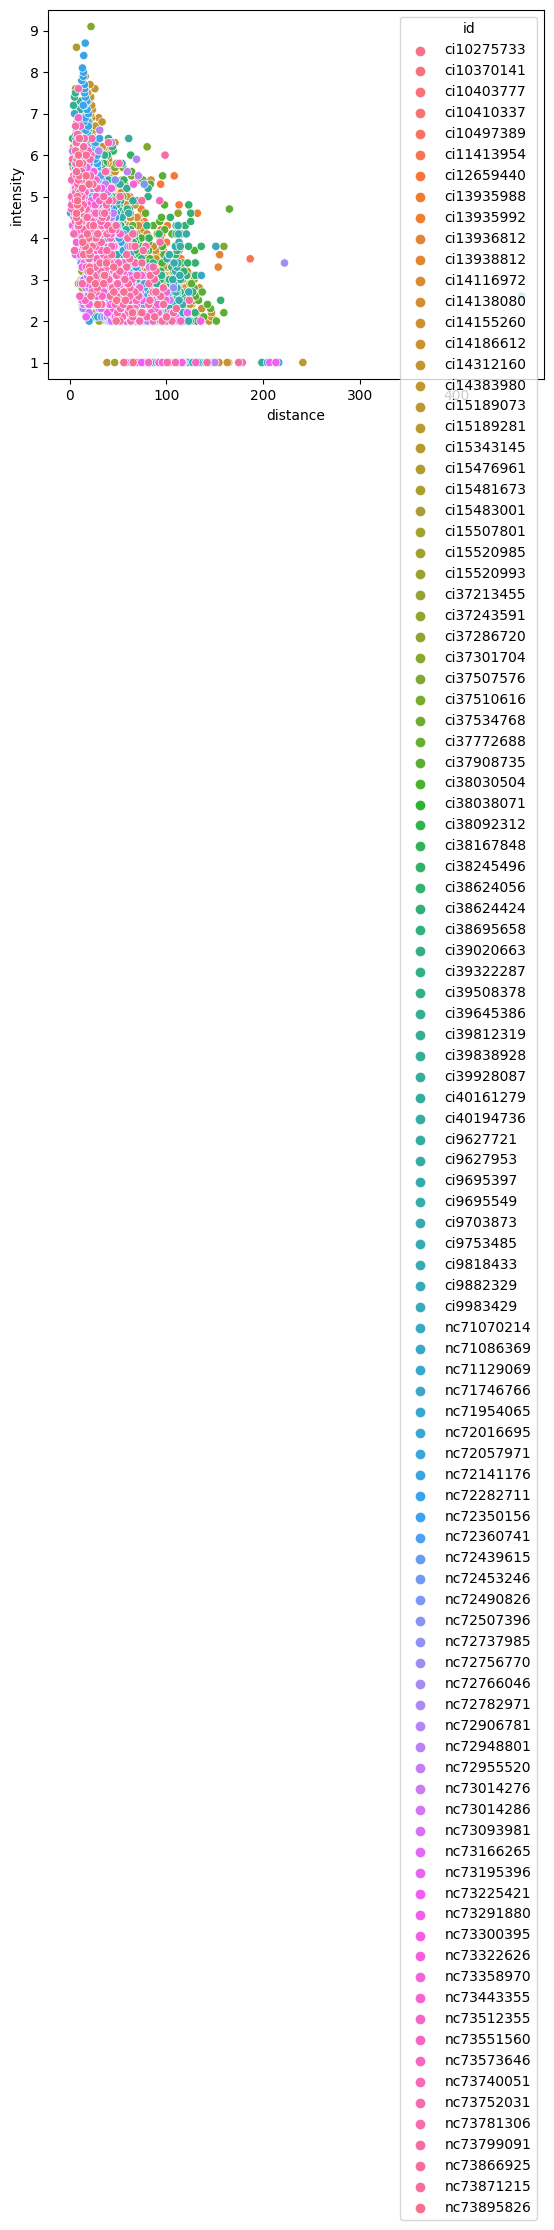

In [129]:
sns.scatterplot(data = dyfi_grouped[dyfi_grouped['distance'] < 500] , x = 'distance', y='intensity', hue = 'id')

In [63]:
#all_csv_combined = pd.merge(pager_city_join, dyfi_grouped, on = 'id', how = 'left')

In [73]:
#all_csv_combined['City'].value_counts()

City
San_Diego        490827
San_Francisco    490827
San_Jose         490827
Los_Angeles      224374
Name: count, dtype: int64

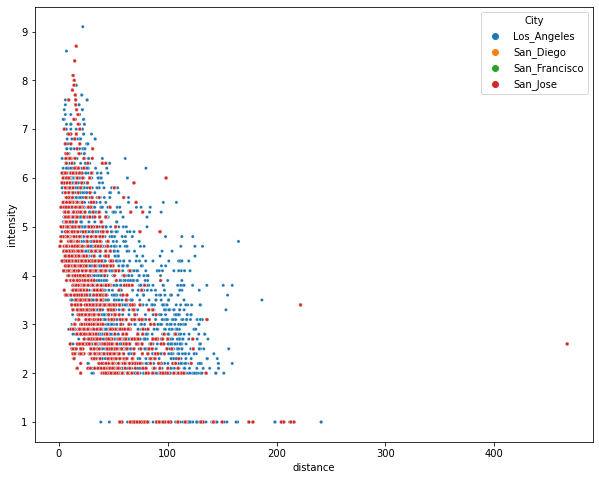

In [72]:
figure = plt.figure(figsize = (10,8))
sns.scatterplot(data = all_csv_combined[all_csv_combined['distance'] < 500] , x = 'distance', 
                y='intensity', 
                hue = 'City',
               s = 10);

In [64]:
len(all_csv_combined)

1696855

In [13]:
all_csv_combined.head()

,Unnamed: 0,id,time,location,latitude,longitude,depth,magnitude,alert,url,...,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10,intensity,distance
0,0,ci9132068,2000-01-01 12:30:37.190,"13km NE of Yucaipa, California",34.116,-116.940,3.237,1.44,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,ci9132076,2000-01-01 13:56:15.960,"8km SSW of Idyllwild, California",33.677,-116.759,20.746,1.30,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,ci9132077,2000-01-01 14:24:46.730,"5km NE of Running Springs, California",34.238,-117.063,8.960,1.60,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,ci9132083,2000-01-01 15:14:15.740,"9km N of Yucaipa, California",34.112,-117.027,7.307,1.70,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,ci9132121,2000-01-01 20:13:05.180,"1km S of Encino, California",34.149,-118.500,8.910,1.30,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
all_csv_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684570 entries, 0 to 1684569
Data columns (total 27 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Unnamed: 0     1684570 non-null  int64  
 1   id             1684570 non-null  object 
 2   time           1684570 non-null  object 
 3   location       1684549 non-null  object 
 4   latitude       1684570 non-null  float64
 5   longitude      1684570 non-null  float64
 6   depth          1684567 non-null  float64
 7   magnitude      1620183 non-null  float64
 8   alert          465 non-null      object 
 9   url            1684570 non-null  object 
 10  eventtype      1684570 non-null  object 
 11  significance   1684570 non-null  int64  
 12  City           1684570 non-null  object 
 13  country        465 non-null      object 
 14  pager_version  465 non-null      float64
 15  mmi1           465 non-null      float64
 16  mmi2           465 non-null      float64
 17  mmi3    

In [74]:
# Get all rows where 'alert' is not null
get_data_w_alerts_2 = all_csv_combined[all_csv_combined['alert'].notna()]

# Get a random sample of 20,000 rows from the rows where 'alert' is null
subset_from_combined_df_3 = all_csv_combined[all_csv_combined['alert'].isna()].sample(n=20000)

# Concatenate the two DataFrames
combined_subset_2 = pd.concat([get_data_w_alerts_2, subset_from_combined_df_3])

In [83]:
combined_subset_2.to_csv('main_dataset')

In [17]:
combined_subset_2.head()

,Unnamed: 0,id,time,location,latitude,longitude,depth,magnitude,alert,url,...,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10,intensity,distance
4937,4937,ci9627721,2001-02-10 21:05:05.780,"6km NNW of Big Bear Lake, CA",34.289500,-116.945833,7.611,4.66,green,https://earthquake.usgs.gov/earthquakes/eventp...,...,484915.0,18251.0,1341.0,0.0,0.0,0.0,0.0,0.0,4703.7,139051.0
4967,4967,ci9627953,2001-02-11 00:39:15.970,"6km NNW of Big Bear Lake, CA",34.287500,-116.941833,6.611,4.22,green,https://earthquake.usgs.gov/earthquakes/eventp...,...,14068.0,1281.0,0.0,0.0,0.0,0.0,0.0,0.0,486.0,12254.0
7318,7318,ci9695397,2001-08-16 18:04:33.770,"9km SE of San Clemente Is. (SE tip), CA",32.759500,-118.288167,6.710,4.36,green,https://earthquake.usgs.gov/earthquakes/eventp...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,946.6,43559.0
7323,7323,ci9695549,2001-08-16 22:06:27.870,"10km SSE of San Clemente Is. (SE tip), CA",32.734167,-118.317667,9.662,4.17,green,https://earthquake.usgs.gov/earthquakes/eventp...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,474.5,22529.0
7559,7559,ci9703873,2001-09-09 23:59:18.040,"2km SE of Beverly Hills, CA",34.059000,-118.388500,7.797,4.24,green,https://earthquake.usgs.gov/earthquakes/eventp...,...,2361232.0,605654.0,105495.0,0.0,0.0,0.0,0.0,0.0,4426.2,49915.0


In [18]:
combined_subset_2.sort_values(by = 'id', ascending = False)

,Unnamed: 0,id,time,location,latitude,longitude,depth,magnitude,alert,url,...,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10,intensity,distance
1177693,55865,nc99686,1987-05-02 16:03:56.030,"4 km SSW of Gilroy, California",36.967333,-121.595833,5.876,1.18,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1177632,55804,nc99677,1987-04-30 21:44:33.100,"5 km NNE of Tres Pinos, California",36.829000,-121.292667,7.041,NaN,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1177626,55798,nc99539,1987-04-30 20:43:29.000,"4 km NE of Tres Pinos, California",36.825000,-121.289500,6.821,1.91,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1665012,55756,nc99436,1987-04-29 05:52:54.970,"4 km E of Union City, California",37.588833,-121.966333,9.075,0.91,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
690043,55643,nc99146,1987-04-24 12:02:41.560,Northern California,38.791167,-122.828500,2.185,2.24,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18082,18082,ci10009145,2004-05-15 18:56:40.740,"9km S of Idyllwild, California",33.656333,-116.727500,15.351,0.75,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18065,18065,ci10008665,2004-05-13 23:28:58.870,"10km NNW of Idyllwild, CA",33.824000,-116.753833,16.351,1.57,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18036,18036,ci10008225,2004-05-13 05:26:34.610,"0km SSW of Loma Linda, CA",34.045333,-117.263167,12.159,2.15,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18013,18013,ci10007509,2004-05-11 08:26:54.240,"2km E of Yucaipa, CA",34.034333,-117.016333,13.079,1.98,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


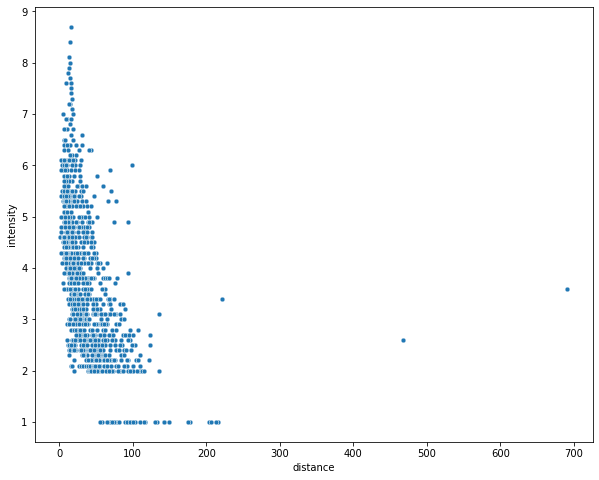

In [82]:
figure = plt.figure(figsize = (10,8))
sns.scatterplot(data = combined_subset_2[combined_subset_2['City'] ==  "San_Jose"] , x = 'distance', 
                y='intensity', 
                #hue = 'City',
               s = 20,
               palette='viridis' );

In [20]:
combined_subset_2['id'].duplicated().sum()

552

In [21]:
combined_subset_2.tail()

,Unnamed: 0,id,time,location,latitude,longitude,depth,magnitude,alert,url,...,mmi3,mmi4,mmi5,mmi6,mmi7,mmi8,mmi9,mmi10,intensity,distance
357232,134946,nc71495285,2010-12-11 03:57:08.460,"9 km WNW of Cobb, California",38.845165,-122.827331,1.839,0.97,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
839527,129813,nc71444620,2010-08-21 12:14:35.310,"10 km N of Hollister, California",36.948167,-121.401000,9.202,0.59,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1658977,49721,nc77888,1986-07-31 06:29:53.370,"6 km NE of Ridgemark, California",36.859833,-121.318833,4.228,1.03,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1408884,211730,nc72257901,2014-07-15 19:21:47.220,"7 km S of Cobb, California",38.757500,-122.731163,2.078,0.49,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169874,46133,ci7047892,1996-10-31 20:38:20.220,"24km NNW of Tehachapi, California",35.318000,-118.583000,4.858,1.51,NaN,https://earthquake.usgs.gov/earthquakes/eventp...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
